<a href="https://colab.research.google.com/github/NimePeter/Credit-Card-Fraud/blob/main/Copy_of_IDD_Peter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Dependencies **

Very important, makes code availabe from one module to another, make code productive, and productive.

In [40]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.svm import OneClassSVM
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Valid = 0", "Fraud = 1"]

**Reading CSV file with pandas**

Storing csv file onto credit card data

In [41]:
credit_card_data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

**CSV File Attached with googel colab notebook.**

Attached csv file from google drive on to google colab with a copy of it attached on to the google dirve. Thus the csv file will still be attached when resuming. 

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading the Dataset on to a Pandas DataFrame.**

Pandas is a library in the python that help us to do analysis on the given data.

**Data Exploration**

Following data display all the transection withine a given time.

In [43]:
credit_card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


**Observation**

Following method autimatically display first five rows and column of the credit card fraud detection data.

In [44]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [45]:
print(credit_card_data.shape)
print(credit_card_data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271

In [46]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [47]:
credit_card_data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

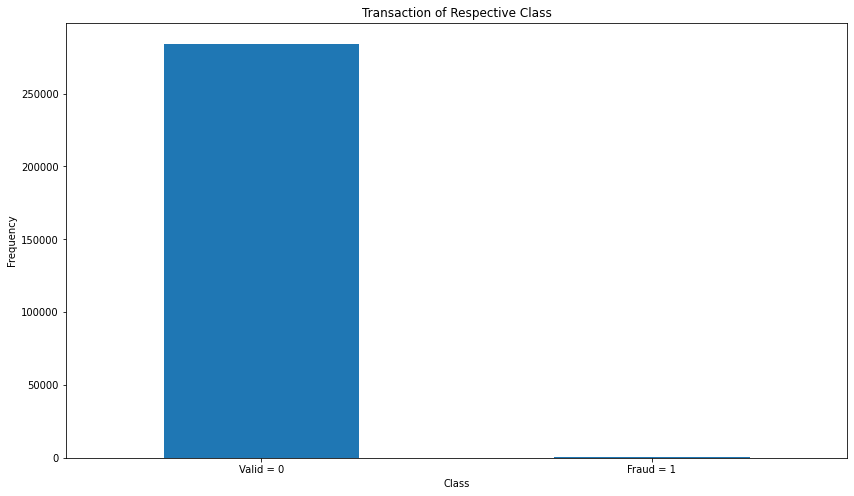

In [48]:
count_classes = pd.value_counts(credit_card_data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction of Respective Class")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

Pre-Processing 

In [49]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [50]:
# Determine number of fraud cases in dataset
fraud = credit_card_data[credit_card_data['Class'] == 1]
valid = credit_card_data[credit_card_data['Class'] == 0]
print('Fraud Cases: {}'.format(len(credit_card_data[credit_card_data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(credit_card_data[credit_card_data['Class'] == 0])))

Fraud Cases: 492
Valid Transactions: 284315


Only 0.17% fraudulent transaction out all the transactions. The data is highly Unbalanced. Lets first apply our models without balancing it and if we don’t get a good accuracy then we can find a way to balance this dataset. But first, let’s implement the model without it and will balance the data only if needed.

Apply statistic method to fraudlant data


In [51]:
print(fraud.Amount.describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


Apply statistic method to valid data

In [52]:
print(valid.Amount.describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


Compare the value for both transection

In [53]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Since it is an unbalance data set, will used undersampeling method

extract equal amount data set (fraud, legit) sample   with  equal amount of data set to test it out as a sample. 

In [54]:
valid_sample = valid.sample(n=492)

Concatenating fraud & valid transection

In [55]:
new_dataset = pd.concat([valid_sample, fraud], axis = 0)

In [56]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
135759,81385.0,-0.527906,1.131465,1.509811,0.495194,0.083921,-0.537437,1.025569,-0.071950,-0.629443,...,-0.331936,-1.070210,0.159126,0.301147,-0.344715,-0.895561,-0.043191,0.059430,36.44,0
33484,37252.0,-0.849539,1.333468,1.182586,0.055493,-0.337826,-1.247965,0.601263,0.004258,0.182096,...,-0.321960,-0.791142,0.064765,0.614807,-0.147628,0.065945,0.448996,0.231482,9.26,0
196868,131735.0,1.755143,-0.929820,-0.063799,0.235824,-0.768784,0.788289,-1.139642,0.372473,1.514179,...,0.321601,0.880246,0.092006,0.235881,-0.358123,-0.299706,0.050303,-0.014713,99.99,0
161990,114724.0,1.933808,-0.591137,-0.392546,0.361336,-0.410182,0.392347,-0.805539,0.130162,1.285946,...,0.002132,0.040905,0.211703,0.052609,-0.422449,0.171506,-0.003730,-0.024901,56.81,0
57315,47855.0,-0.825726,0.990480,0.587002,0.701454,0.170856,-0.208570,0.190366,0.495663,-0.735665,...,0.195697,0.371607,-0.054823,-0.383149,-0.200334,-0.309751,-0.078257,0.060743,11.45,0


In [57]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [58]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [59]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94174.752033,0.030045,0.106077,0.031565,-0.052705,-0.041874,0.014712,-0.001930,0.064771,0.049163,...,-0.003957,-0.005575,0.010340,-0.033224,0.020374,0.013420,0.014484,0.011330,0.005037,82.651260
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Divide the data into target and features 

In [60]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [61]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
135759   81385.0 -0.527906  1.131465  1.509811  0.495194  0.083921 -0.537437   
33484    37252.0 -0.849539  1.333468  1.182586  0.055493 -0.337826 -1.247965   
196868  131735.0  1.755143 -0.929820 -0.063799  0.235824 -0.768784  0.788289   
161990  114724.0  1.933808 -0.591137 -0.392546  0.361336 -0.410182  0.392347   
57315    47855.0 -0.825726  0.990480  0.587002  0.701454  0.170856 -0.208570   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [62]:
print(Y)

135759    0
33484     0
196868    0
161990    0
57315     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


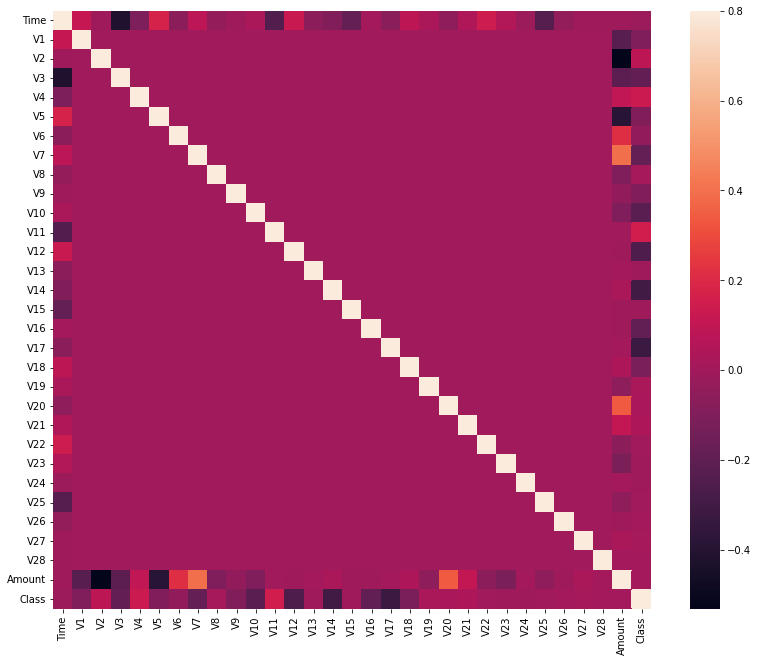

In [63]:
# Correlation matrix
corrmat = credit_card_data.corr()
fig = plt.figure(figsize = (14, 11))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [64]:
#separating the X and the Y values
#X = credit_card_data.drop(['Class'], axis = 1) 
#Y = credit_card_data["Class"] 
#print(X.shape) 
#print(Y.shape) 
# getting just the values for the sake of processing  
# (its a numpy array with no columns) 
#xData = X.values 
#yData = Y.values 

In [65]:
#training and testing data bifurcation
from sklearn.model_selection import train_test_split 
#split the data into training and testing sets 
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 4) 

In [66]:
print(X.shape, X_Train.shape, X_Test.shape)

(984, 30) (787, 30) (197, 30)


In [67]:
#building the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 
#random forest model creation 
rfc = RandomForestClassifier() 
rfc.fit(X_Train, Y_Train) 
#predictions 
yPred = rfc.predict(X_Test) 


In [68]:
#building all kinds of evaluating parameters
#from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
  
n_outliers = len(fraud) 
n_errors = (yPred != Y_Test).sum() 
print("The model used is Random Forest classifier") 
  
acc = accuracy_score(Y_Test, yPred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(Y_Test, yPred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(Y_Test, yPred) 
print("The recall is {}".format(rec)) 

f1 = f1_score(Y_Test, yPred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(Y_Test, yPred) 
print("The Matthews correlation coefficient is {} ".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.934010152284264
The precision is 0.9885057471264368
The recall is 0.8775510204081632
The F1-Score is 0.9297297297297297
The Matthews correlation coefficient is 0.8734119362123363 


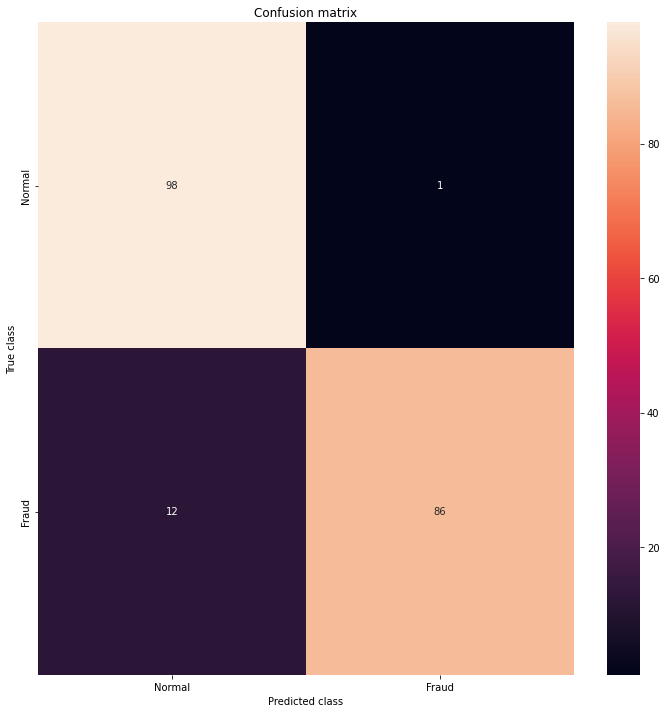

In [69]:
#visulalizing the confusion matrix
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(Y_Test, yPred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

#Hyperparameter Tuning 
Is mainly dealing with optimal perfomrance of the hyperparameters (higher values) of value models  of parameter that learning algorithms use.

Two features will be use in tuning the hypaparameter, max_features (number of features that will be use to construct the preditctions model). While n_estimators is the number of trees that will be using to construct the prediction model.

GridSearchCV - Mainly search through the given set of concrete parameter value from the given set of grid parameter. In our case will use max_estimators & n_estimators. 

In [89]:
from sklearn.model_selection import GridSearchCV

max_features_range = np.arange(1,7,1)
n_estimators_range = np.arange(10,240,10)
param_grid = dict(max_features = max_features_range, n_estimators = n_estimators_range)

rfc = RandomForestClassifier

grid = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 6)

In [87]:
grid.fit(X_Train, Y_Train)

TypeError: ignored

#Model Training for Logistic Regression

#Training Logistic Regression with training data

In [75]:
model = LogisticRegression()

In [76]:
model.fit(X_Train, Y_Train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

#Model Evaluation & Accuracy Score

In [77]:
#Accuracy score on training data
X_Train_Prediction = model.predict(X_Train)
Training_Data_Accuracy = accuracy_score(X_Train_Prediction, Y_Train)

In [78]:
print('Accuracy score on Training Data : ', Training_Data_Accuracy)

Accuracy score on Training Data :  0.9555273189326556


In [79]:
#Accuracy score on testing data
X_Test_Prediction = model.predict(X_Test)
Test_Data_Accuracy = accuracy_score(X_Test_Prediction, Y_Test)

In [80]:
print('Accuracy score on Training Data: ', Test_Data_Accuracy)

Accuracy score on Training Data:  0.9390862944162437
